<a href="https://colab.research.google.com/github/jorgenriquez/Redes-Neuronales-con-Python/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AlexNet**

### **Paper original**
https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

### **El proyecto ImageNet**
La primera red neuronal plenamente entrenable, LeNet-5, propuesta por Yann LeCun y su equipo de Bell Labs en el año 1989, logró reconocer, con un nivel aceptable de éxito, dígitos manuscritos en sobres del servicio postal estadounidense. Este logro animó a la investigadora de Stanford University Fei-Fei Li a proponer la creación de un banco de datos de imágenes de todas clases, que pudieran servir de base para el entrenamiento de redes neuronales especializadas en el reconocimiento visual. Fruto de estos esfuerzos surgió el proyecto ImageNet, en el cual operarios humanos retribuidos etiquetaban manualmente imágenes, que luego se agrupaban en conjuntos semánticos. Cada conjunto semántico se integraba por aquellas imágenes cuyas etiquetas tenían significados semejantes. En la actualidad, el archivo de ImageNet contiene 100.000 conjuntos semánticos (synsets) diferentes, dotados de 1.000 imágenes cada uno.



## **AlexNet**

In [ ]:
import keras
from keras.datasets import cifar10
from keras import backend as K
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model
from keras.layers import concatenate,Dropout,Flatten
import numpy as np
from keras import optimizers,regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import he_normal
from keras.callbacks import LearningRateScheduler, TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt


In [ ]:
# Cargar los datos de CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Calcular la media y la desviación estándar para normalizar los datos
mean = np.mean(x_train, axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

# Definir el número de clases
num_classes = 10

# Convertir las etiquetas a formato categórico
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
"""fig = plt.figure(figsize=(18, 8))
columns = 5
rows = 5
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i], interpolation='lanczos')"""

"fig = plt.figure(figsize=(18, 8))\ncolumns = 5\nrows = 5\nfor i in range(1, columns*rows + 1):\n    fig.add_subplot(rows, columns, i)\n    plt.imshow(x_train[i], interpolation='lanczos')"

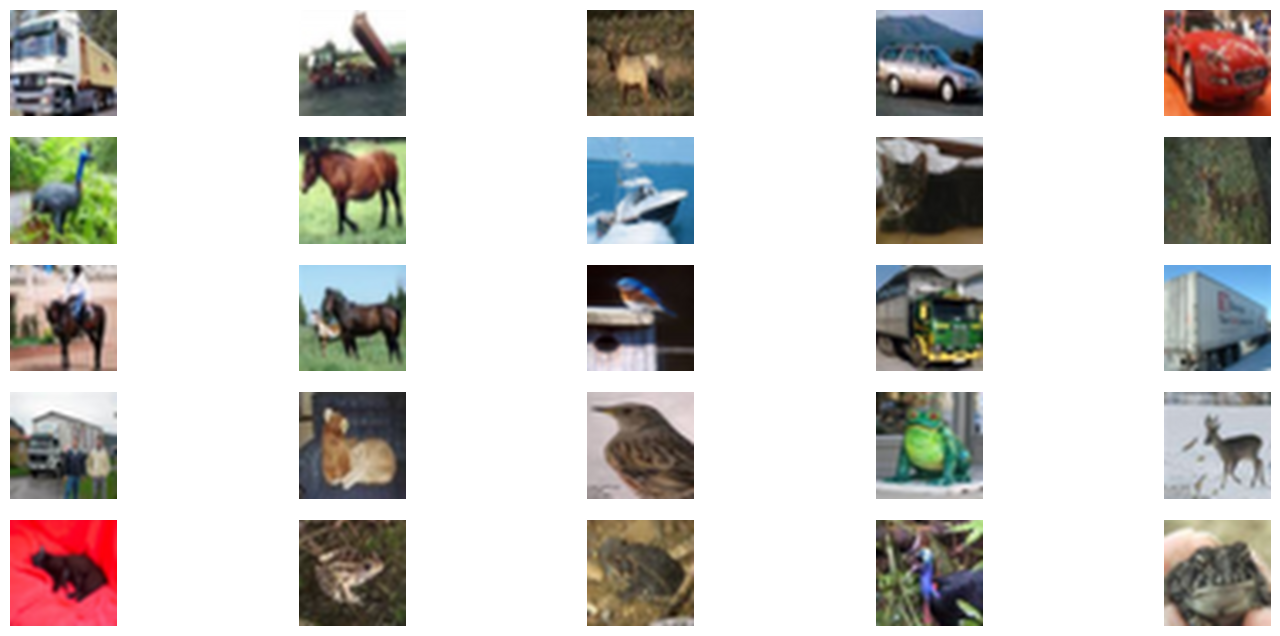

In [ ]:
# Reescalar las imágenes al rango [0, 1] para visualización
x_train_vis = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))

# Visualizar algunas imágenes
fig = plt.figure(figsize=(18, 8))
columns = 5
rows = 5
for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train_vis[i], interpolation='lanczos')
    plt.axis('off')
plt.show()

In [ ]:
# def alexnet(img_input,classes=10):
#     xnet = Conv2D(96,(11,11),strides=(4,4),padding='same',
#                activation='relu',kernel_initializer='uniform')(img_input)
#     xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same',data_format=DATA_FORMAT)(xnet)

#     xnet = Conv2D(256,(5,5),strides=(1,1),padding='same',
#                activation='relu',kernel_initializer='uniform')(xnet)
#     xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same',data_format=DATA_FORMAT)(xnet)

#     xnet = Conv2D(384,(3,3),strides=(1,1),padding='same',
#                activation='relu',kernel_initializer='uniform')(xnet)

#     xnet = Conv2D(384,(3,3),strides=(1,1),padding='same',
#                activation='relu',kernel_initializer='uniform')(xnet)

#     xnet = Conv2D(256,(3,3),strides=(1,1),padding='same',
#                activation='relu',kernel_initializer='uniform')(xnet)
#     xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same',data_format=DATA_FORMAT)(xnet)
#     xnet = Flatten()(xnet)
#     xnet = Dense(4096,activation='relu')(xnet)
#     xnet = Dropout(0.25)(xnet)
#     xnet = Dense(4096,activation='relu')(xnet)
#     xnet = Dropout(0.25)(xnet)
#     out_model = Dense(classes, activation='softmax')(xnet)
#     return out_model

In [ ]:
def alexnet(img_input, classes=10):
    xnet = Conv2D(96, (11, 11), strides=(4, 4), padding='same',
                  activation='relu', kernel_initializer='uniform')(img_input)
    xnet = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(xnet)

    xnet = Conv2D(256, (5, 5), strides=(1, 1), padding='same',
                  activation='relu', kernel_initializer='uniform')(xnet)
    xnet = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(xnet)

    xnet = Conv2D(384, (3, 3), strides=(1, 1), padding='same',
                  activation='relu', kernel_initializer='uniform')(xnet)

    xnet = Conv2D(384, (3, 3), strides=(1, 1), padding='same',
                  activation='relu', kernel_initializer='uniform')(xnet)

    xnet = Conv2D(256, (3, 3), strides=(1, 1), padding='same',
                  activation='relu', kernel_initializer='uniform')(xnet)
    xnet = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(xnet)

    xnet = Flatten()(xnet)
    xnet = Dense(4096, activation='relu')(xnet)
    xnet = Dropout(0.25)(xnet)
    xnet = Dense(4096, activation='relu')(xnet)
    xnet = Dropout(0.25)(xnet)
    out_model = Dense(classes, activation='softmax')(xnet)
    return out_model

In [ ]:
img_input=Input(shape=(32,32,3))
output = alexnet(img_input)
model=Model(img_input,output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 384)         885120

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# Definir optimizador
sgd = SGD(lr=0.01, momentum=0.8, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Configurar callback para guardar el mejor modelo
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Definir número de épocas y tamaño del batch
epochs = 50
batch_size = 64  # Define un tamaño de batch apropiado
iterations = len(x_train) // batch_size  # Número de iteraciones por época

# Configurar data augmentation
datagen = ImageDataGenerator(horizontal_flip=True,
                             width_shift_range=0.115,
                             height_shift_range=0.115,
                             fill_mode='constant', cval=0.)
datagen.fit(x_train)

# Iniciar entrenamiento
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=iterations,
                    epochs=epochs,
                    callbacks=callbacks_list,
                    validation_data=(x_test, y_test))


Epoch 1/50


<ipython-input-10-e7e18593c1a7>:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),


781/781 [==============================] - ETA: 0s - loss: 1.6989 - accuracy: 0.3733

781/781 [==============================] - 42s 45ms/step - loss: 1.6989 - accuracy: 0.3733 - val_loss: 1.4566 - val_accuracy: 0.4633
Epoch 2/50
780/781 [============================>.] - ETA: 0s - loss: 1.4011 - accuracy: 0.4945

781/781 [==============================] - 31s 40ms/step - loss: 1.4006 - accuracy: 0.4947 - val_loss: 1.2274 - val_accuracy: 0.5627
Epoch 3/50
781/781 [==============================] - ETA: 0s - loss: 1.2706 - accuracy: 0.5473

781/781 [==============================] - 32s 41ms/step - loss: 1.2706 - accuracy: 0.5473 - val_loss: 1.1864 - val_accuracy: 0.5775
Epoch 4/50
781/781 [==============================] - ETA: 0s - loss: 1.1904 - accuracy: 0.5781

781/781 [==============================] - 32s 42ms/step - loss: 1.1904 - accuracy: 0.5781 - val_loss: 1.0996 - val_accuracy: 0.6124
Epoch 5/50
780/781 [============================>.] - ETA: 0s - loss: 1.1240 - accuracy: 0.6011

781/781 [==============================] - 32s 42ms/step - loss: 1.1239 - accuracy: 0.6011 - val_loss: 1.0558 - val_accuracy: 0.6310
Epoch 6/50
780/781 [============================>.] - ETA: 0s - loss: 1.0713 - accuracy: 0.6197

781/781 [==============================] - 33s 42ms/step - loss: 1.0712 - accuracy: 0.6198 - val_loss: 1.0173 - val_accuracy: 0.6507
Epoch 7/50
781/781 [==============================] - ETA: 0s - loss: 1.0285 - accuracy: 0.6366

781/781 [==============================] - 32s 41ms/step - loss: 1.0285 - accuracy: 0.6366 - val_loss: 0.9888 - val_accuracy: 0.6542
Epoch 8/50
781/781 [==============================] - ETA: 0s - loss: 0.9856 - accuracy: 0.6502

781/781 [==============================] - 31s 40ms/step - loss: 0.9856 - accuracy: 0.6502 - val_loss: 0.9495 - val_accuracy: 0.6656
Epoch 9/50
781/781 [==============================] - ETA: 0s - loss: 0.9519 - accuracy: 0.6633

781/781 [==============================] - 33s 42ms/step - loss: 0.9519 - accuracy: 0.6633 - val_loss: 0.8911 - val_accuracy: 0.6939
Epoch 10/50
781/781 [==============================] - ETA: 0s - loss: 0.9174 - accuracy: 0.6769

781/781 [==============================] - 32s 41ms/step - loss: 0.9174 - accuracy: 0.6769 - val_loss: 0.9857 - val_accuracy: 0.6732
Epoch 11/50
781/781 [==============================] - ETA: 0s - loss: 0.8979 - accuracy: 0.6842

781/781 [==============================] - 32s 40ms/step - loss: 0.8979 - accuracy: 0.6842 - val_loss: 0.8818 - val_accuracy: 0.6880
Epoch 12/50
781/781 [==============================] - ETA: 0s - loss: 0.8684 - accuracy: 0.6937

781/781 [==============================] - 36s 46ms/step - loss: 0.8684 - accuracy: 0.6937 - val_loss: 0.8841 - val_accuracy: 0.6931
Epoch 13/50
781/781 [==============================] - ETA: 0s - loss: 0.8400 - accuracy: 0.7051

781/781 [==============================] - 33s 42ms/step - loss: 0.8400 - accuracy: 0.7051 - val_loss: 0.8762 - val_accuracy: 0.6985
Epoch 14/50
780/781 [============================>.] - ETA: 0s - loss: 0.8202 - accuracy: 0.7096

781/781 [==============================] - 33s 42ms/step - loss: 0.8203 - accuracy: 0.7096 - val_loss: 0.8552 - val_accuracy: 0.7054
Epoch 15/50
780/781 [============================>.] - ETA: 0s - loss: 0.7962 - accuracy: 0.7183

781/781 [==============================] - 31s 40ms/step - loss: 0.7965 - accuracy: 0.7183 - val_loss: 0.8324 - val_accuracy: 0.7101
Epoch 16/50
780/781 [============================>.] - ETA: 0s - loss: 0.7765 - accuracy: 0.7252

781/781 [==============================] - 32s 42ms/step - loss: 0.7766 - accuracy: 0.7252 - val_loss: 0.8271 - val_accuracy: 0.7178
Epoch 17/50
780/781 [============================>.] - ETA: 0s - loss: 0.7604 - accuracy: 0.7340

781/781 [==============================] - 32s 41ms/step - loss: 0.7607 - accuracy: 0.7339 - val_loss: 0.8764 - val_accuracy: 0.7017
Epoch 18/50
781/781 [==============================] - ETA: 0s - loss: 0.7431 - accuracy: 0.7360

781/781 [==============================] - 32s 40ms/step - loss: 0.7431 - accuracy: 0.7360 - val_loss: 0.8423 - val_accuracy: 0.7099
Epoch 19/50
781/781 [==============================] - ETA: 0s - loss: 0.7201 - accuracy: 0.7446

781/781 [==============================] - 32s 41ms/step - loss: 0.7201 - accuracy: 0.7446 - val_loss: 0.7977 - val_accuracy: 0.7265
Epoch 20/50
781/781 [==============================] - ETA: 0s - loss: 0.7022 - accuracy: 0.7499

781/781 [==============================] - 31s 40ms/step - loss: 0.7022 - accuracy: 0.7499 - val_loss: 0.8289 - val_accuracy: 0.7211
Epoch 21/50
781/781 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.7546

781/781 [==============================] - 32s 41ms/step - loss: 0.6906 - accuracy: 0.7546 - val_loss: 0.8219 - val_accuracy: 0.7234
Epoch 22/50
780/781 [============================>.] - ETA: 0s - loss: 0.6702 - accuracy: 0.7614

781/781 [==============================] - 32s 41ms/step - loss: 0.6704 - accuracy: 0.7613 - val_loss: 0.8109 - val_accuracy: 0.7190
Epoch 23/50
780/781 [============================>.] - ETA: 0s - loss: 0.6623 - accuracy: 0.7654

781/781 [==============================] - 32s 41ms/step - loss: 0.6622 - accuracy: 0.7654 - val_loss: 0.8683 - val_accuracy: 0.7171
Epoch 24/50
781/781 [==============================] - ETA: 0s - loss: 0.6455 - accuracy: 0.7714

781/781 [==============================] - 33s 42ms/step - loss: 0.6455 - accuracy: 0.7714 - val_loss: 0.8145 - val_accuracy: 0.7269
Epoch 25/50
781/781 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.7760

781/781 [==============================] - 32s 41ms/step - loss: 0.6311 - accuracy: 0.7760 - val_loss: 0.8246 - val_accuracy: 0.7224
Epoch 26/50
781/781 [==============================] - ETA: 0s - loss: 0.6148 - accuracy: 0.7810

781/781 [==============================] - 32s 41ms/step - loss: 0.6148 - accuracy: 0.7810 - val_loss: 0.8053 - val_accuracy: 0.7343
Epoch 27/50
781/781 [==============================] - ETA: 0s - loss: 0.5996 - accuracy: 0.7864

781/781 [==============================] - 31s 40ms/step - loss: 0.5996 - accuracy: 0.7864 - val_loss: 0.8139 - val_accuracy: 0.7344
Epoch 28/50
781/781 [==============================] - ETA: 0s - loss: 0.5874 - accuracy: 0.7912

781/781 [==============================] - 33s 43ms/step - loss: 0.5874 - accuracy: 0.7912 - val_loss: 0.7772 - val_accuracy: 0.7428
Epoch 29/50
781/781 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.7989

781/781 [==============================] - 31s 40ms/step - loss: 0.5680 - accuracy: 0.7989 - val_loss: 0.8415 - val_accuracy: 0.7336
Epoch 30/50
780/781 [============================>.] - ETA: 0s - loss: 0.5621 - accuracy: 0.7991

781/781 [==============================] - 31s 40ms/step - loss: 0.5623 - accuracy: 0.7990 - val_loss: 0.8347 - val_accuracy: 0.7393
Epoch 31/50
780/781 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.8067

781/781 [==============================] - 32s 42ms/step - loss: 0.5420 - accuracy: 0.8068 - val_loss: 0.8575 - val_accuracy: 0.7274
Epoch 32/50
780/781 [============================>.] - ETA: 0s - loss: 0.5286 - accuracy: 0.8095

781/781 [==============================] - 31s 40ms/step - loss: 0.5287 - accuracy: 0.8094 - val_loss: 0.8978 - val_accuracy: 0.7273
Epoch 33/50
781/781 [==============================] - ETA: 0s - loss: 0.5223 - accuracy: 0.8109

781/781 [==============================] - 33s 42ms/step - loss: 0.5223 - accuracy: 0.8109 - val_loss: 0.8304 - val_accuracy: 0.7379
Epoch 34/50
781/781 [==============================] - ETA: 0s - loss: 0.5079 - accuracy: 0.8175

781/781 [==============================] - 32s 41ms/step - loss: 0.5079 - accuracy: 0.8175 - val_loss: 0.8336 - val_accuracy: 0.7400
Epoch 35/50
780/781 [============================>.] - ETA: 0s - loss: 0.4943 - accuracy: 0.8221

781/781 [==============================] - 31s 40ms/step - loss: 0.4944 - accuracy: 0.8220 - val_loss: 0.8493 - val_accuracy: 0.7350
Epoch 36/50
780/781 [============================>.] - ETA: 0s - loss: 0.4809 - accuracy: 0.8280

781/781 [==============================] - 34s 43ms/step - loss: 0.4808 - accuracy: 0.8281 - val_loss: 0.8621 - val_accuracy: 0.7333
Epoch 37/50
780/781 [============================>.] - ETA: 0s - loss: 0.4683 - accuracy: 0.8336

781/781 [==============================] - 31s 40ms/step - loss: 0.4685 - accuracy: 0.8334 - val_loss: 0.8620 - val_accuracy: 0.7356
Epoch 38/50
781/781 [==============================] - ETA: 0s - loss: 0.4600 - accuracy: 0.8347

781/781 [==============================] - 33s 42ms/step - loss: 0.4600 - accuracy: 0.8347 - val_loss: 0.8600 - val_accuracy: 0.7358
Epoch 39/50
781/781 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.8382

781/781 [==============================] - 31s 40ms/step - loss: 0.4472 - accuracy: 0.8382 - val_loss: 0.8987 - val_accuracy: 0.7310
Epoch 40/50
781/781 [==============================] - ETA: 0s - loss: 0.4349 - accuracy: 0.8436

781/781 [==============================] - 32s 42ms/step - loss: 0.4349 - accuracy: 0.8436 - val_loss: 0.9147 - val_accuracy: 0.7348
Epoch 41/50
780/781 [============================>.] - ETA: 0s - loss: 0.4262 - accuracy: 0.8457

781/781 [==============================] - 31s 40ms/step - loss: 0.4266 - accuracy: 0.8455 - val_loss: 0.8835 - val_accuracy: 0.7425
Epoch 42/50
781/781 [==============================] - ETA: 0s - loss: 0.4131 - accuracy: 0.8500

781/781 [==============================] - 32s 41ms/step - loss: 0.4131 - accuracy: 0.8500 - val_loss: 0.9241 - val_accuracy: 0.7213
Epoch 43/50
781/781 [==============================] - ETA: 0s - loss: 0.4003 - accuracy: 0.8572

781/781 [==============================] - 32s 40ms/step - loss: 0.4003 - accuracy: 0.8572 - val_loss: 0.8936 - val_accuracy: 0.7404
Epoch 44/50
781/781 [==============================] - ETA: 0s - loss: 0.3950 - accuracy: 0.8575

781/781 [==============================] - 32s 41ms/step - loss: 0.3950 - accuracy: 0.8575 - val_loss: 0.9180 - val_accuracy: 0.7449
Epoch 45/50
780/781 [============================>.] - ETA: 0s - loss: 0.3796 - accuracy: 0.8627

781/781 [==============================] - 33s 42ms/step - loss: 0.3794 - accuracy: 0.8628 - val_loss: 0.9230 - val_accuracy: 0.7403
Epoch 46/50
781/781 [==============================] - ETA: 0s - loss: 0.3671 - accuracy: 0.8680

781/781 [==============================] - 31s 40ms/step - loss: 0.3671 - accuracy: 0.8680 - val_loss: 0.9535 - val_accuracy: 0.7368
Epoch 47/50
781/781 [==============================] - ETA: 0s - loss: 0.3600 - accuracy: 0.8702

781/781 [==============================] - 32s 41ms/step - loss: 0.3600 - accuracy: 0.8702 - val_loss: 0.9283 - val_accuracy: 0.7378
Epoch 48/50
780/781 [============================>.] - ETA: 0s - loss: 0.3553 - accuracy: 0.8718

781/781 [==============================] - 32s 42ms/step - loss: 0.3553 - accuracy: 0.8718 - val_loss: 0.9589 - val_accuracy: 0.7398
Epoch 49/50
781/781 [==============================] - ETA: 0s - loss: 0.3399 - accuracy: 0.8786

781/781 [==============================] - 32s 41ms/step - loss: 0.3399 - accuracy: 0.8786 - val_loss: 0.9223 - val_accuracy: 0.7382
Epoch 50/50
781/781 [==============================] - ETA: 0s - loss: 0.3320 - accuracy: 0.8812

781/781 [==============================] - 31s 40ms/step - loss: 0.3320 - accuracy: 0.8812 - val_loss: 1.0820 - val_accuracy: 0.7306


In [ ]:
model.history

Text(0, 0.5, 'Accuracy')

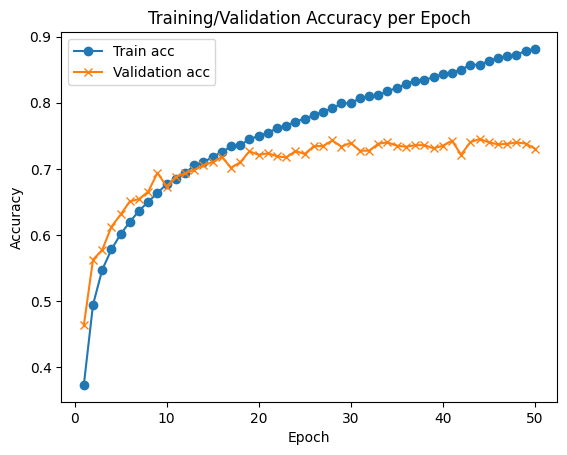

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()

# Usa 'accuracy' en lugar de 'acc' y 'val_accuracy' en lugar de 'val_acc'
ax.plot([None] + model.history.history['accuracy'], 'o-')
ax.plot([None] + model.history.history['val_accuracy'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc=0)
ax.set_title('Training/Validation Accuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'acc')

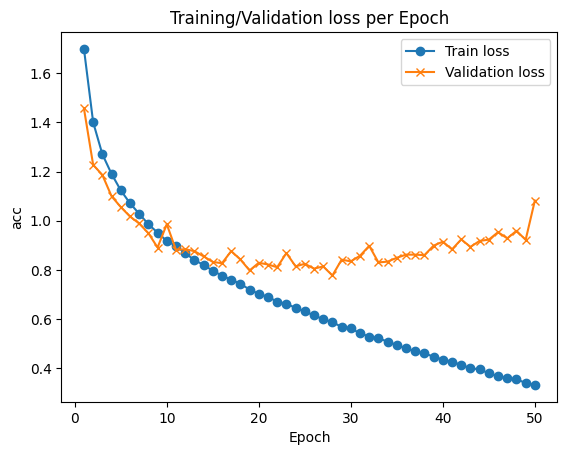

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + model.history.history['loss'], 'o-')
ax.plot([None] + model.history.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_test_labels = np.argmax(y_test, axis=1)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Asegúrate de que y_test y predictions estén en el mismo formato
y_test_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test_labels, predicted_labels)
print(conf_matrix)

[[854  24  20   5   2   1  20   3  39  32]
 [ 28 860   5   2   0   0   9   3  14  79]
 [ 80  10 629  33  40  55  91  37  17   8]
 [ 47  33  53 396  37 176 165  31  15  47]
 [ 70  10  53  37 596  47 114  53  12   8]
 [ 35  10  39 122  17 640  69  45   6  17]
 [ 13  10  24  16  11  18 890   2   6  10]
 [ 43   7  14  23  30  61  25 776   6  15]
 [ 72  35   8   7   1   3   6   0 841  27]
 [ 48  87   6   1   1   2  10   1  20 824]]


In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

8

In [ ]:
cm = confusion_matrix(rounded_labels, np.argmax(predictions,axis=1))

In [ ]:
cm

array([[854,  24,  20,   5,   2,   1,  20,   3,  39,  32],
       [ 28, 860,   5,   2,   0,   0,   9,   3,  14,  79],
       [ 80,  10, 629,  33,  40,  55,  91,  37,  17,   8],
       [ 47,  33,  53, 396,  37, 176, 165,  31,  15,  47],
       [ 70,  10,  53,  37, 596,  47, 114,  53,  12,   8],
       [ 35,  10,  39, 122,  17, 640,  69,  45,   6,  17],
       [ 13,  10,  24,  16,  11,  18, 890,   2,   6,  10],
       [ 43,   7,  14,  23,  30,  61,  25, 776,   6,  15],
       [ 72,  35,   8,   7,   1,   3,   6,   0, 841,  27],
       [ 48,  87,   6,   1,   1,   2,  10,   1,  20, 824]])

In [ ]:
def plot_confusion_matrix(cm):
    cm = [row/sum(row)   for row in cm]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Oranges)
    fig.colorbar(cax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class IDs')
    plt.ylabel('True Class IDs')
    plt.show()

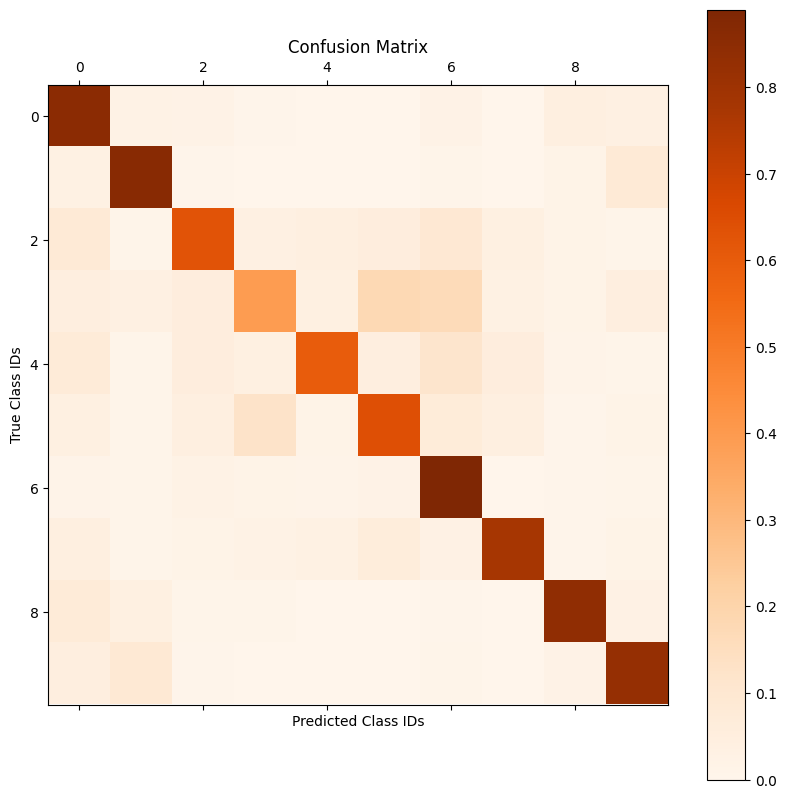

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

In [ ]:
# Calcula las métricas de clasificación
accuracy = accuracy_score(y_test_labels, predicted_labels)
precision = precision_score(y_test_labels, predicted_labels, average='macro')
recall = recall_score(y_test_labels, predicted_labels, average='macro')
f1 = f1_score(y_test_labels, predicted_labels, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


target_names = [f'Class {i}' for i in range(10)]

# Reporte de clasificación detallado
report = classification_report(y_test_labels, predicted_labels, target_names=target_names)
print("Classification Report:")
print(report)

Accuracy: 0.7306
Precision: 0.7345
Recall: 0.7306
F1 Score: 0.7244
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.66      0.85      0.75      1000
     Class 1       0.79      0.86      0.82      1000
     Class 2       0.74      0.63      0.68      1000
     Class 3       0.62      0.40      0.48      1000
     Class 4       0.81      0.60      0.69      1000
     Class 5       0.64      0.64      0.64      1000
     Class 6       0.64      0.89      0.74      1000
     Class 7       0.82      0.78      0.80      1000
     Class 8       0.86      0.84      0.85      1000
     Class 9       0.77      0.82      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000

